# Assignment 1

This assignment covers material from Weeks 1–4. Think of it as a spot-check: five exercises that test important analytical and visualization skills from the first part of the course.

## Formalia:

<mark>Please read the **[assignment overview page](https://github.com/suneman/socialdata2026/wiki/Assignments)** carefully before proceeding.</mark> This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

***If you fail to follow these simple instructions, it will negatively impact your grade!***

**Due date and time**: The assignment is due on Monday March 2nd, 2026 at 23:55. Hand in your files via DTU Learn. 

## Important Notes:
**All exercises use your combined SF crime dataset** (2003–present) that you built during Week 2, along with your Personal Focus Crimes. Make sure you have those ready before you start.
* **Hint**: The number of focus crimes are up to you, but choosing very few focus-crimes (1-5, let's say) feels like taking the easy way out to me, so to get top marks, you'll need 8 or more focus crimes (but it's not that more are better, 16 isn't necessarily better than 8).

Each assignment draws directly on the weekly exercises - you should be able to pull your work directly from there.

<div class="alert alert-block alert-info">
The same LLM guidance applies here as during the weekly exercises: use your LLM freely for coding, pandas syntax, and plot formatting. Do not use it for interpretation, reflection, or anything that asks for your own thinking. 
<br>  <br>
If you use and LLM to cheat, you are missing out on your education ... it will mean that you're not getting all you can out of this class ... and, more importantly, that you are literally wasting this crucial time of your DTU-journey, designed to make you smarter and ready for the world.
</div>

---
## Assignment 1.1: Temporal Overview

Let's start by getting the big picture of how crime has changed over the full 20+ year period covered by your combined dataset.

*Draws from*: Week 1, Exercises 4.1 and 4.2 — applied here to the full merged dataset (2003–present) rather than just 2018–present.

> * Using your combined dataset (2003–present), plot the total number of incidents **per year** for each of your Personal Focus Crimes. Display at least the years 2003–2025. 
> * Make sure your plot follows good visualization practices: labeled axes, a legend, a descriptive title.
> * Identify and comment on at least two notable features in the plot — for example, long-term trends, sudden drops or spikes, or the impact of COVID-19 in 2020. For each feature, offer a possible explanation.

In [47]:
#Loading the combine dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Final_Crime_Dataset.csv')
df = df.drop_duplicates(subset=['IncidntNum', 'Category'])

df = df.dropna(subset=['PdDistrict'])
df = df[df['PdDistrict'] != 'OUT OF SF']

Data Visualization for the Different Crimes types we selected

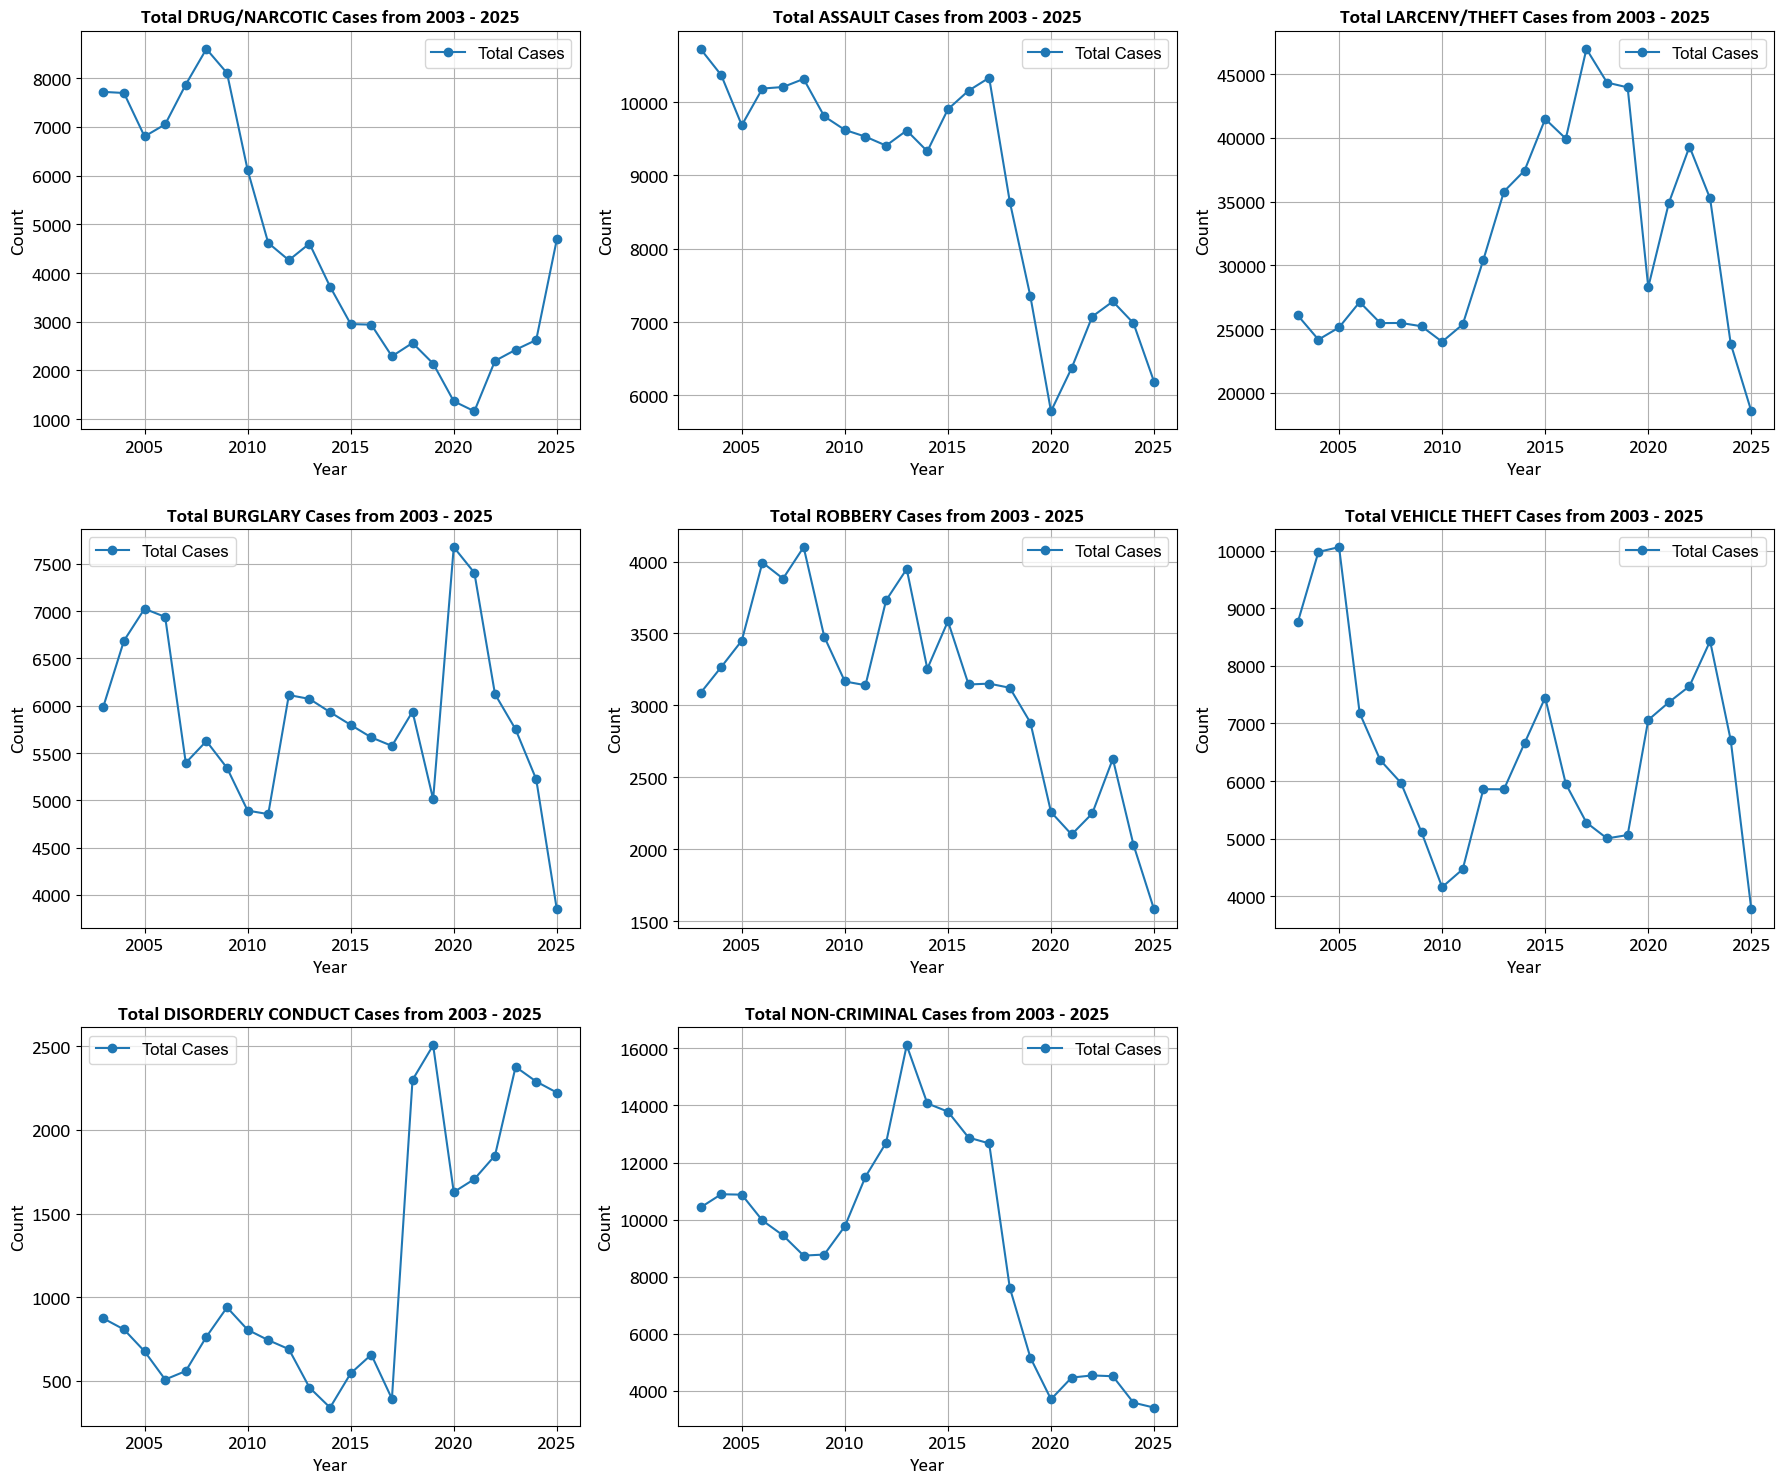

In [48]:

Catagory = df['Category'].unique()

df['Year'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.year

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten() 

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

for i, cat in enumerate(Catagory):
    ax = axes[i]

    cat_df = df[df['Category'] == cat]
    cat_yearly_counts = cat_df.groupby('Year').size()

    ax.plot(cat_yearly_counts.index, cat_yearly_counts.values, marker='o')

    ax.set_title(f'Total {cat} Cases from 2003 - 2025', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.grid(True)
    ax.legend(['Total Cases'])
    plt.tight_layout()

for j in range(len(Catagory), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.25)
plt.show()


## Assignment 1.1.3: Comments

The impact of covid is noticeable in the graph. Almost all crimes dropped on 2020 with the exception of Bulglary and Vehicle Theft. Burlguragry reached an all time high on 2020 and stayed relatively similar level in 2021 which were the peak COVID time priod. A possible explanation is increase in bulgarly due to financial hardship during covid while a decrease in other crimes due to lockdowns. Another interesting trend I found was the drop of drug related crime in 2010-2011. One possible explanation is, 2009 was when President Obama was elected and in 2010 he changed madantaory minimum to be charged with possesion with crack cocaine with the fair sentencing act(2010) which came in effect August 2010. This could explain a 3500+ cases decrease just in San Francisco.


---
## Assignment 1.2: Crime Profiles by Police District

Different parts of the city have very different crime patterns. Here we quantify that using conditional probabilities.

*Draws from*: Week 3, Exercises 2.1 and 2.2.

> * For each police district in your dataset, compute the **conditional crime profile**: for each of your Personal Focus Crimes, calculate
>
>   $$r(\text{crime}, \text{district}) = \frac{P(\text{crime} \mid \text{district})}{P(\text{crime})}$$
>
>   A value above 1 means that crime type is *over-represented* in that district relative to the city-wide average; below 1 means it is *under-represented*.
> * Visualize these ratios in a way that makes it easy to compare across both districts and crime types. (Simple barcharts are fine, but you may also use ideas from more complex visualization techniques, for example, a heatmap could work well here, but you're free to choose another format if you can justify it.)
> * Pick **one district** whose profile stands out to you. Describe the pattern and offer an explanation for why that district looks the way it does. Are there geographic, demographic, or other factors that might explain it?

In [58]:
df['Category'] = df['Category'].str.capitalize()
df['PdDistrict'] = df['PdDistrict'].str.capitalize()

total_crimes = df.shape[0]
crime_probabilities = df['Category'].value_counts() / total_crimes

districts = df['PdDistrict'].unique()
categories = crime_probabilities.index

relative_matrix = pd.DataFrame(index=districts, columns=categories)

for district in districts:
    district_df = df[df['PdDistrict'] == district]
    district_probs = (
        district_df['Category']
        .value_counts(normalize=True)
        .reindex(categories, fill_value=0)
    )
    
    relative_probs = district_probs / crime_probabilities
    relative_matrix.loc[district] = relative_probs

relative_matrix = relative_matrix.astype(float)


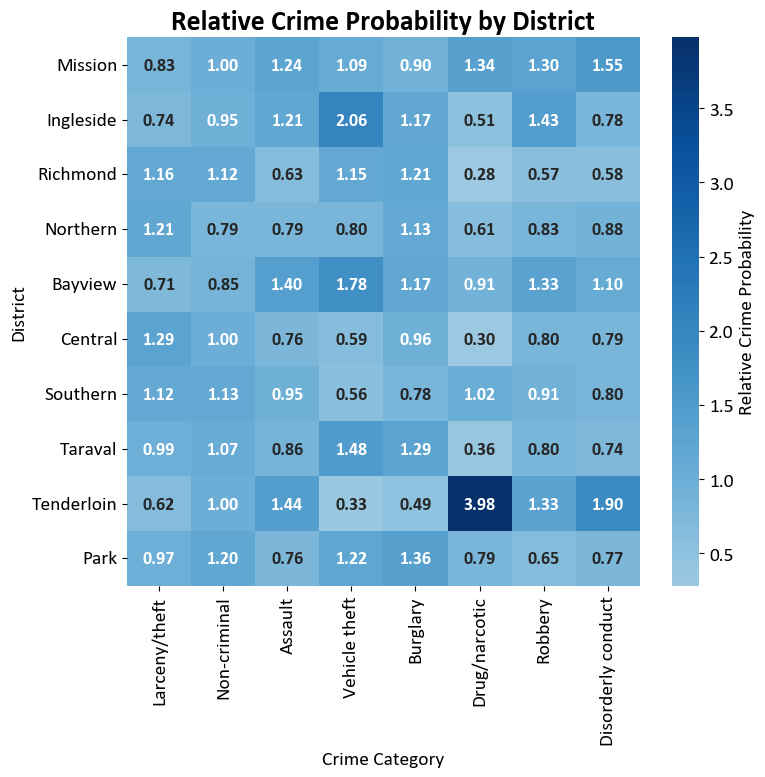

In [82]:

plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size'] = 14
plt.figure(figsize=(8, 8))


sns.heatmap(
    relative_matrix,
    annot=True,         
    fmt=".2f",          
    cmap='Blues',   
    center=1,           
    cbar_kws={'label': 'Relative Crime Probability'},
    annot_kws={"size": 13, "weight": 'bold'},

    
)

plt.title('Relative Crime Probability by District', fontsize=20, fontweight='bold')
plt.xlabel('Crime Category')
plt.ylabel('District')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The district that stands out for me is the Tenderlion as it has realtively low vehicle theft and burgluarly but high Drug cases. Seeing data like this my inital assumtion was that this is low income neighbourhood. A lot of studies and in the US has shown bidirectional correlation between Low income and Drug use. Additoanlly if there are not of valuable cars or valuables in homes in makes sense that veichle theft and bulguraly would be low. To confirm my assumption I refered to statoistical atlas who visualize data from the US census Bureau and it confirmed that Tenderloin has the lowest median income in the state at 24,000 USD (for reference the median income of San Franscisco is 140,000 USD) with aroud 58% of the household income falling short of the 25,000 USD mark. One thing I did found interesting was Chinatown(Central) and Hunterpoint(Bayview) are the other poor neighbourhoods however they dont have this relative Drug Cases.

---
## Assignment 1.3: Visualizing Distributions

This exercise asks you to recreate several classic plot types from DAOST Chapter 2 using your own crime data — putting visualization theory into practice.

*Draws from*: Week 3, Exercises 5.2 and 5.3.

> **Part A — Jitter plot**
> * Pick one of your Personal Focus Crimes and a suitable time interval (somewhere between a month and 6 months, depending on how common the crime is). Create a jitter plot of the incident times during a single hour (e.g. 13:00–14:00): let time run along the $x$-axis and add vertical jitter.
> * What does the jitter plot reveal about how times are recorded in the dataset? Are incidents clustered at certain minutes (on the hour, half hour, etc.)? What does this tell you about the precision of the data?
>
> **Part B — Probability plot**
> * Using the same geographic data from Part B, create a probability plot (QQ plot) for the latitude distribution of each of your two crime types. (`scipy.stats.probplot` is your friend here.)
> * What reference distribution are you comparing against? What would it mean if the points fell exactly on the straight line? Where does the distribution deviate from normal, and what does that deviation tell you about the geography of crime in SF?
>
> **Part C — Box plots of time-of-day**
> * For each of your Personal Focus Crimes, extract the time-of-day of every incident.
> * Create box plots showing the time-of-day distribution for all your Personal Focus Crimes side by side.
> * What patterns do you see? Are there crimes that happen mostly at night? Mostly during business hours? For crimes that peak late at night, does the box plot handle the wrap-around at midnight well? What goes wrong?
> * Above, feel free to use alternatives to box plots — violin plots, swarm plots, or raincloud plots — if you think they reveal more. If you do, briefly explain what the alternative shows that the box plot doesn't.

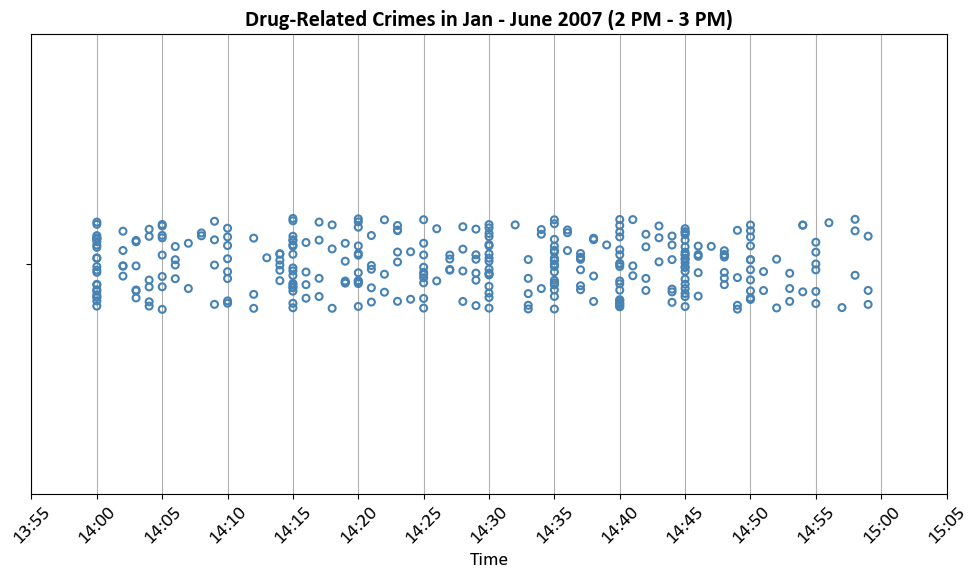

In [114]:
drug_df = df[df['Category'] == 'Drug/narcotic'].copy()
drug_df['Date'] = pd.to_datetime(drug_df['Date'], format='%Y-%m-%d')
drug_df = drug_df[(drug_df['Date'] >= '2007-01-01') & (drug_df['Date'] <= '2007-06-30')]

drug_df['Time'] = pd.to_datetime(drug_df['Time'], format='%H:%M')
drug_df = drug_df[(drug_df['Time'].dt.hour == 14)]

plt.figure(figsize=(10, 6))

ax = sns.stripplot(
    x='Time',
    data=drug_df,
    jitter=True,
    edgecolor='steelblue',
    linewidth=1.5,
    facecolors='none'
)

# Set x-axis ticks every 5 minutes
from matplotlib.dates import MinuteLocator, DateFormatter
ax.xaxis.set_major_locator(MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.xticks(rotation=45)

ax.set_xlim(pd.to_datetime('13:55', format='%H:%M'), pd.to_datetime('15:05', format='%H:%M'))

plt.title('Drug-Related Crimes in Jan - June 2007 (2 PM - 3 PM)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

The jiter plots reveal that data is more concentrated around 00, 15, 30, 35 and 45. This definetly means that the time in our data set isn't the most precious.There is a possibility that the criminals are super precise and comit crimes on rounded number but it most likely we are not able recall the time precisisely when reporting and they get report in a rounded number.

---
## Assignment 1.4: Spatial Power Law

Is crime spread evenly across San Francisco, or is it concentrated in a small number of hotspots? Let's find out.

*Draws from*: Week 4, Exercise 2.2.

Use your **most common Personal Focus Crime** (by total incident count) for this exercise.

> * **Step 1**: Divide San Francisco into a grid of approximately $100\text{m} \times 100\text{m}$ cells using latitude and longitude. It is fine to ignore that the Earth isn't flat — the approximation is good enough for this purpose.
>     * **Hint**: `np.histogram2d` works well here. Focus on points within the SF peninsula; filter out geographic outliers.
> * **Step 2**: Count the number of incidents of your chosen crime in each grid cell (use all years of data).
> * **Step 3**: Tally the distribution. Count how many cells have exactly $k$ incidents — call this $N(k)$ — for $k = 0, 1, 2, \ldots$ up to the maximum.
> * **Step 4**: Plot $(k+1)$ vs $N(k)$ on **linear axes**.
> * **Step 5**: Plot $(k+1)$ vs $N(k)$ on **loglog axes**.
> * **Step 6**: Does your crime follow a power-law spatial distribution? How can you tell from the loglog plot?
> * **Step 7**: If crime is spatially concentrated in a small number of cells, what does that imply for how we interpret neighborhood-level crime statistics? Does the "average block" tell you anything useful?

---
## Assignment 1.5: Regression and Correlation

Which of your Personal Focus Crimes share the most similar weekly rhythm — and which are completely out of sync?

*Draws from*: Week 4, Exercises 3.1, 3.2, and 3.3.

Select **at least 4** of your Personal Focus Crimes for this exercise. More is fine - if you want to be closer to the actual weekly exercise.

> * For each selected crime type, compute the total number of incidents for each of the **168 hours of the week** (i.e., Monday 00:00–01:00, Monday 01:00–02:00, ..., Sunday 23:00–00:00). Each crime type will give you a vector of 168 values.
>
> * **Scatterplot matrix**: Create a grid of pairwise scatterplots — one panel per pair of crime types, with one crime on each axis and each of the 168 hours as a point. Label each panel clearly with the two crime types being compared.
>
> * **Linear regression**: Using the closed-form equations from Week 4 (not a library), fit a regression line $y = ax + b$ to each pair and add it to the relevant panel:
>   $$a = \frac{\sum_i x_i y_i - N\langle x\rangle\langle y\rangle}{\sum_i x_i^2 - N\langle x\rangle^2}, \qquad b = \langle y \rangle - a\langle x \rangle$$
>
> * **$R^2$**: Compute $R^2$ for each pair and display the value on each panel. 
>
> * Looking at your results: which pair of crimes is **most correlated**? Which is **least correlated**? Does the answer match your intuition? Why might two crime types share a weekly rhythm — or not?